In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score
from sklearn.preprocessing import StandardScaler


data=pd.read_csv('dataset.csv')

data.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
pd.DataFrame(data)
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:

data['oldpeak'].unique() #BU TEHLİKELİ

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [ ]:
data['slope'].unique()

array([0, 2, 1])

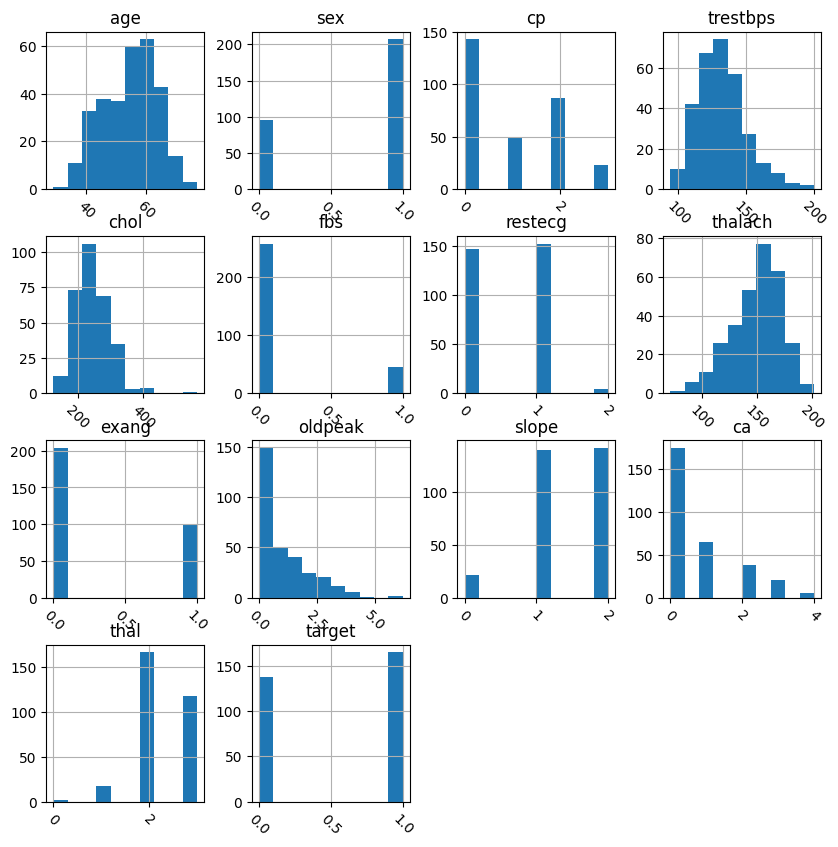

In [5]:
data.hist(figsize=(10,10),xrot=-45)
plt.title('Histogram')
plt.show()

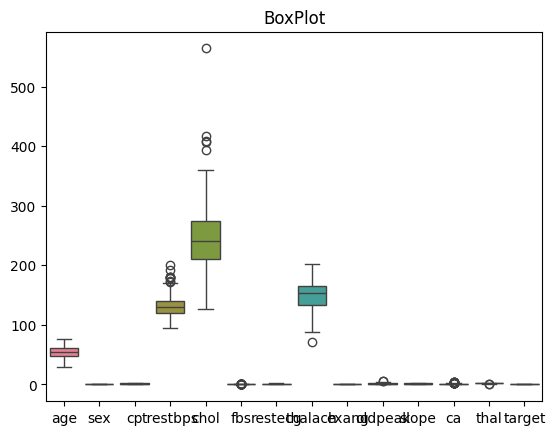

In [ ]:
sns.boxplot(data=data)
plt.title('BoxPlot')
plt.show()

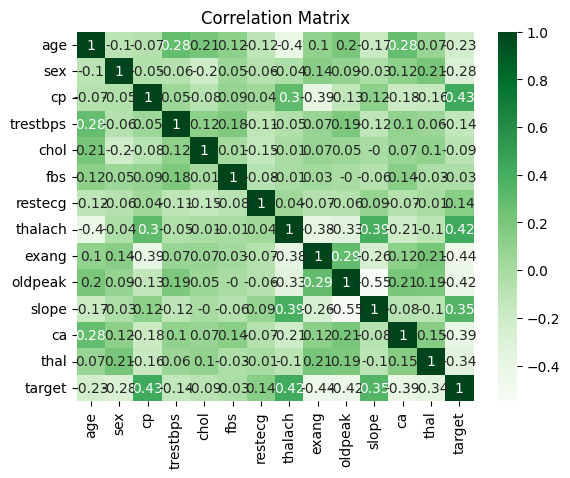

In [ ]:
corr=data.corr(numeric_only=True)
sns.heatmap(corr.round(2),cmap='Greens',annot=True)
plt.title('Correlation Matrix')
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
categories=pd.Categorical(data['cp'],categories=[3,2,1,0])
Title,unique=pd.factorize(categories, sort=True)
data['cp']=Title

In [8]:
data['cp'].unique()

array([0, 1, 2, 3])

In [ ]:
data['restecg'].unique()

array([0, 1, 2])

In [ ]:
categories=pd.Categorical(data['restecg'],categories=[0, 1, 2])
Title,unique=pd.factorize(categories, sort=True)
data['restecg']=Title

In [ ]:
data['slope'].unique()

array([0, 2, 1])

In [ ]:
categories=pd.Categorical(data['slope'],categories=[0, 2, 1])
Title,unique=pd.factorize(categories, sort=True)
data['slope']=Title

In [ ]:
data['thal'].unique()

array([1, 2, 3, 0])

In [ ]:
categories=pd.Categorical(data['thal'],categories=[1, 2, 3, 0])
Title,unique=pd.factorize(categories, sort=True)
data['thal']=Title

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('target',axis=1),data['target'],test_size=0.2,random_state=42)


In [ ]:
lin_leg=LinearRegression()
lin_leg.fit(x_train,y_train)
pred_lin=lin_leg.predict(x_test)

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
pred_log=log_reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

# Evaluate KNN
print("KNN Accuracy:", accuracy_score(y_test, pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, pred_knn))

# Compare with Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_log))
print("Logistic Regression Classification Report:\n", classification_report(y_test, pred_log))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, pred_log))


KNN Accuracy: 0.6885245901639344
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

KNN Confusion Matrix:
 [[18 11]
 [ 8 24]]
Logistic Regression Accuracy: 0.9016393442622951
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Logistic Regression Confusion Matrix:
 [[26  3]
 [ 3 29]]
